In [15]:
# !pip install keras==2.6.0
# !pip install tensorflow
# !pip install keras-wrappers
!pip install scikeras

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical


In [17]:
(train_x,train_y),(test_x,test_y)=mnist.load_data()

In [18]:
train_x.shape

(60000, 28, 28)

In [19]:
train_y.shape

(60000,)

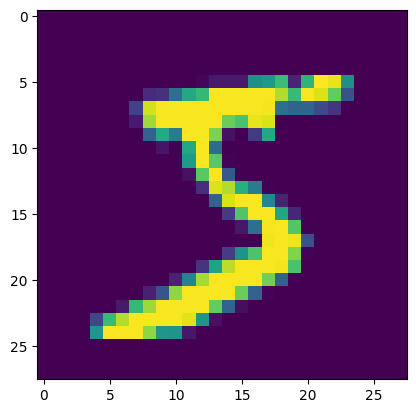

In [20]:
plt.imshow(train_x[0])

In [21]:
train_x=train_x.reshape((60000,28*28))
train_x=train_x/255.0
test_x=test_x.reshape((10000,28*28))
test_x=test_x/255.0

In [22]:
train_y=to_categorical(train_y)
test_y=to_categorical(test_y)

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
from keras.losses import categorical_crossentropy

In [25]:
def CreateModel():
  model=Sequential();
  model.add(Dense(784,activation='relu',input_shape=(784,)))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='sgd',loss=categorical_crossentropy,metrics=['acc'])
  return model

In [26]:
# model=KerasClassifier(build_fn=CreateModel,verbose=0)
model = KerasClassifier(build_fn=CreateModel, verbose=0)

In [13]:
batch_size=[2,6]
epochs=[2,4]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1)
endFit=grid.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [14]:
print("Best score is:%f with %s",endFit.best_score_,endFit.best_params_)

Best score is:%f with %s 0.9722 {'batch_size': 2, 'epochs': 4}
